In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

### Задание 1
На вход передатчика подается сигнал косинуса с частотами 50, 150 и 450 Гц.

Определите спектр сигнала с помощью стандартной функции быстрого преобразования Фурье.

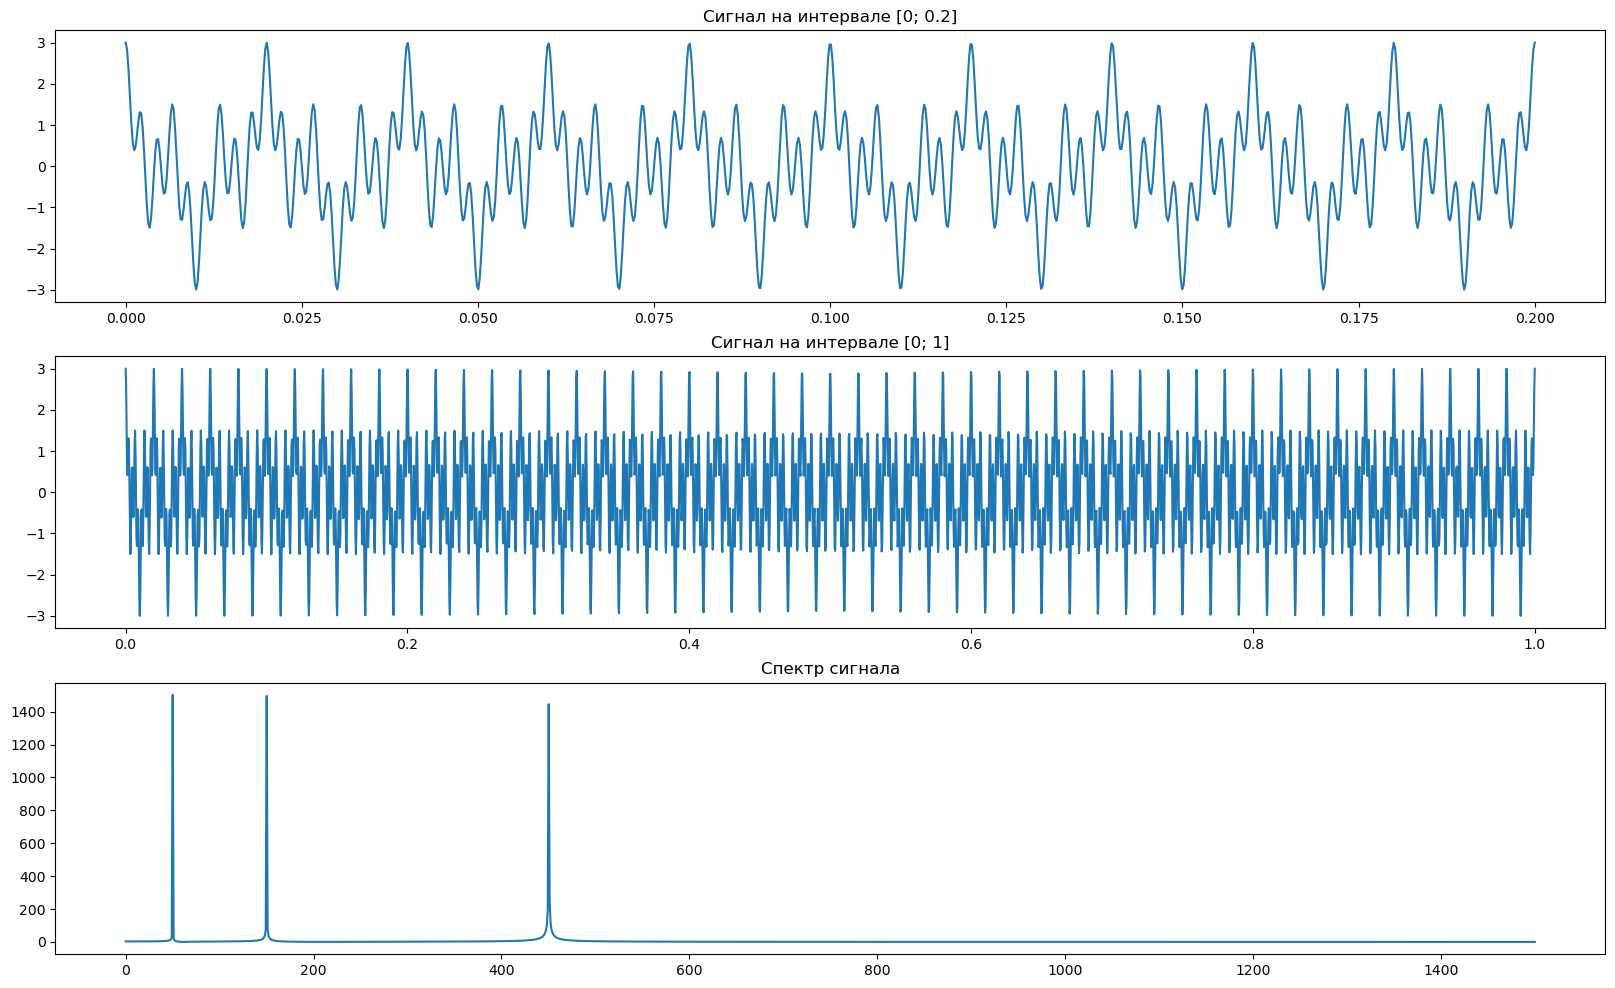

In [2]:
amp = 1
frequencies = [50, 150, 450]
omegas = [2 * np.pi * frequencies[i] for i in range(len(frequencies))]

def signal(t):
    return amp * (np.cos(t * omegas[0]) + np.cos(t * omegas[1]) + np.cos(t * omegas[2]))


x = np.linspace(0, 1, 3000)
x_freq = np.linspace(0, 1500, 1500)

y = signal(x)
y_fft = np.fft.fft(y)

plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.plot(np.linspace(0, 0.2, 1000), signal(np.linspace(0, 0.2, 1000)))
plt.title("Сигнал на интервале [0; 0.2]")

plt.subplot(3, 1, 2)
plt.plot(x, y)
plt.title("Сигнал на интервале [0; 1]")

plt.subplot(3, 1, 3)
plt.plot(x_freq, np.abs(y_fft[:len(y_fft)//2]))
plt.title("Спектр сигнала")

plt.show()

### Задание 2
Реализовать алгоритм фильтра Баттерворта нижних частот 2-го порядка (ФНЧ) к сигналу из
пункта 1, убедиться, что происходит подавление высоких частот сигнала 150 и 450 Гц. При
моделировании ФНЧ воспользоваться формулой (32) из методички “Козулин Цифровая
обработка сигналов Python.pdf”. Частоту среза фильтра Баттерворта подберите самостоятельно. В
данном примере частота среза может варьироваться в диапазоне от 70 до 120 Гц.

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и спектр фильтра
Баттерворта. Убедитесь, что амплитуда исходного сигнала для частоты 50 Гц будет совпадать с
амплитудой отфильтрованного сигнала.

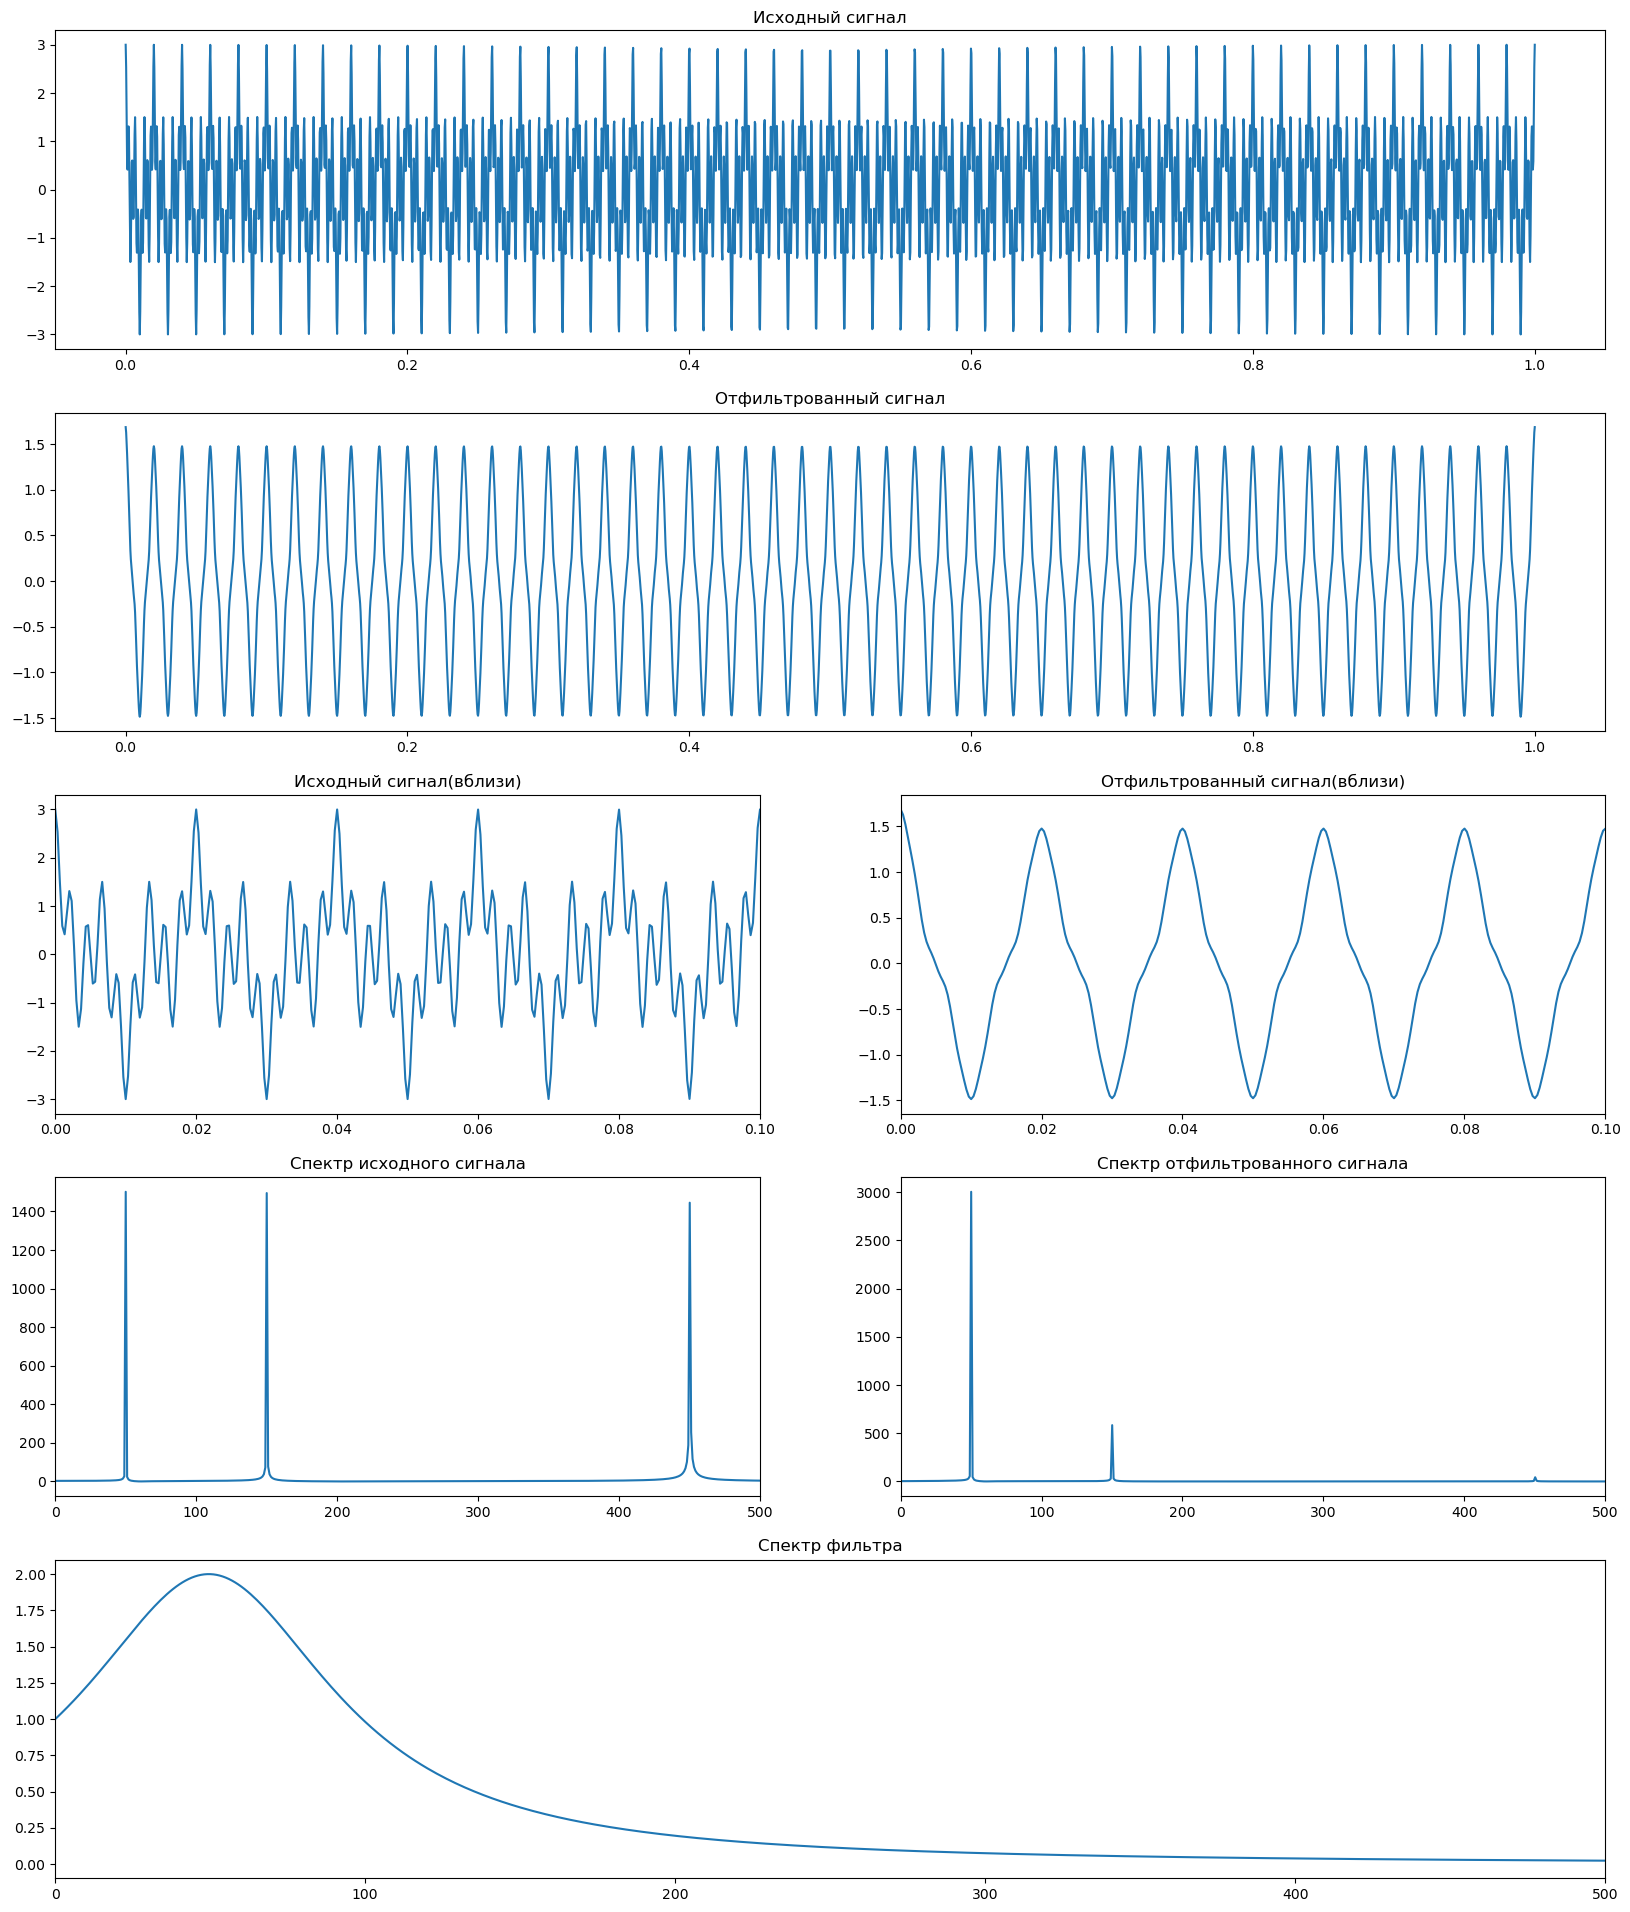

In [3]:
def butterworth_low(signal_frequency, cutoff_frequency):
    cutoff_frequency *= np.pi * 2
    signal_frequency *= 1j * np.pi * 2
    
    transmission_coefficient = (cutoff_frequency ** 2) / (-signal_frequency ** 2 + 1j * np.sqrt(2) * cutoff_frequency * signal_frequency + cutoff_frequency ** 2)
    return transmission_coefficient


filter_coef = butterworth_low(np.asarray(np.fft.fftfreq(len(x), 1/3000), complex), 70)
filtered_signal = np.fft.ifft(y_fft * filter_coef.real)

plt.figure(figsize=(20, 24))

plt.subplot(5, 1, 1)
plt.plot(x, y)
plt.title("Исходный сигнал")

plt.subplot(5, 1, 2)
plt.plot(x, filtered_signal.real)
plt.title("Отфильтрованный сигнал")

plt.subplot(5, 2, 5)
plt.plot(x, y)
plt.xlim(0, 0.1)
plt.title("Исходный сигнал(вблизи)")

plt.subplot(5, 2, 6)
plt.plot(x, filtered_signal.real)
plt.xlim(0, 0.1)
plt.title("Отфильтрованный сигнал(вблизи)")

plt.subplot(5, 2, 7)
plt.plot(x_freq, np.abs(y_fft[:len(y_fft)//2]))
plt.xlim(0, 500)
plt.title("Спектр исходного сигнала")

plt.subplot(5, 2, 8)
plt.plot(x_freq, np.abs((np.fft.fft(filtered_signal))[:len(y_fft)//2]))
plt.xlim(0, 500)
plt.title("Спектр отфильтрованного сигнала")

plt.subplot(5, 1, 5)
plt.plot(x_freq, filter_coef.real[:len(y_fft)//2])
plt.xlim(0, 500)
plt.title("Спектр фильтра")

plt.show()

### Задание 3
Оставьте в сигнале только 50 Гц и 450 Гц.

На этот же график нанесите Ваш отфильтрованный сигнал.

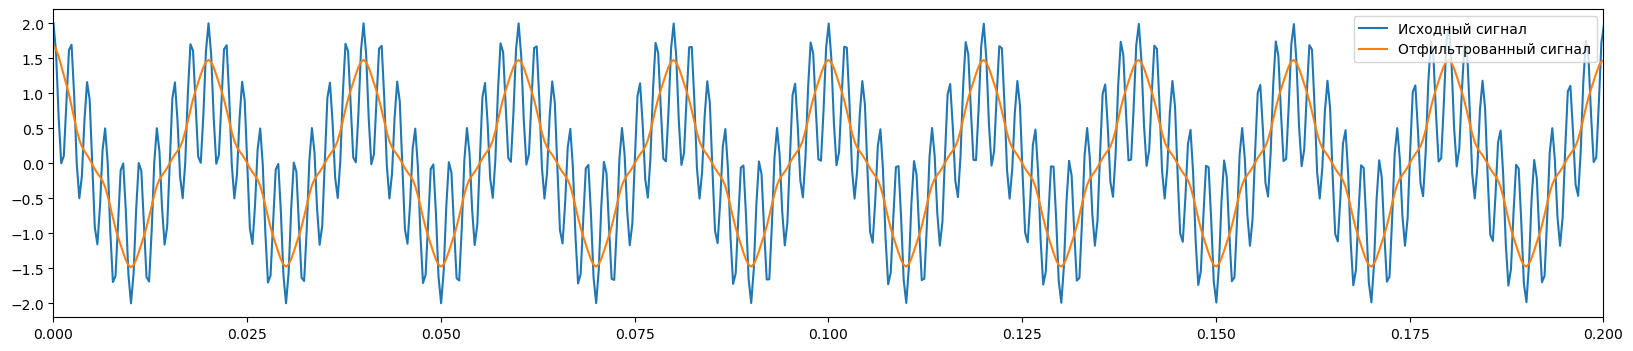

In [4]:
def signal2(t):
    return amp * (np.cos(t * omegas[0]) + np.cos(t * omegas[2]))


y2 = signal2(x)
y_fft2 = np.fft.fft(y2)

filter_coef = butterworth_low(np.asarray(np.fft.fftfreq(len(x), 1/3000), complex), 70)
filtered_signal = np.fft.ifft(y_fft * filter_coef.real)

plt.figure(figsize=(20, 4))
plt.plot(x, y2, label='Исходный сигнал')
plt.plot(x, filtered_signal.real, label='Отфильтрованный сигнал')
plt.xlim(0, 0.2)
plt.legend(loc='upper right')
plt.show()

### Задание 4
Построить фильтр высоких частот (ФВЧ) к сигналу, убедиться, что происходит
подавление низких частот сигнала (50 и 150 Гц), воспользовавшись формулой (35) из
методички “Козулин Цифровая обработка сигналов Python.pdf”.

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтра
ФВЧ.

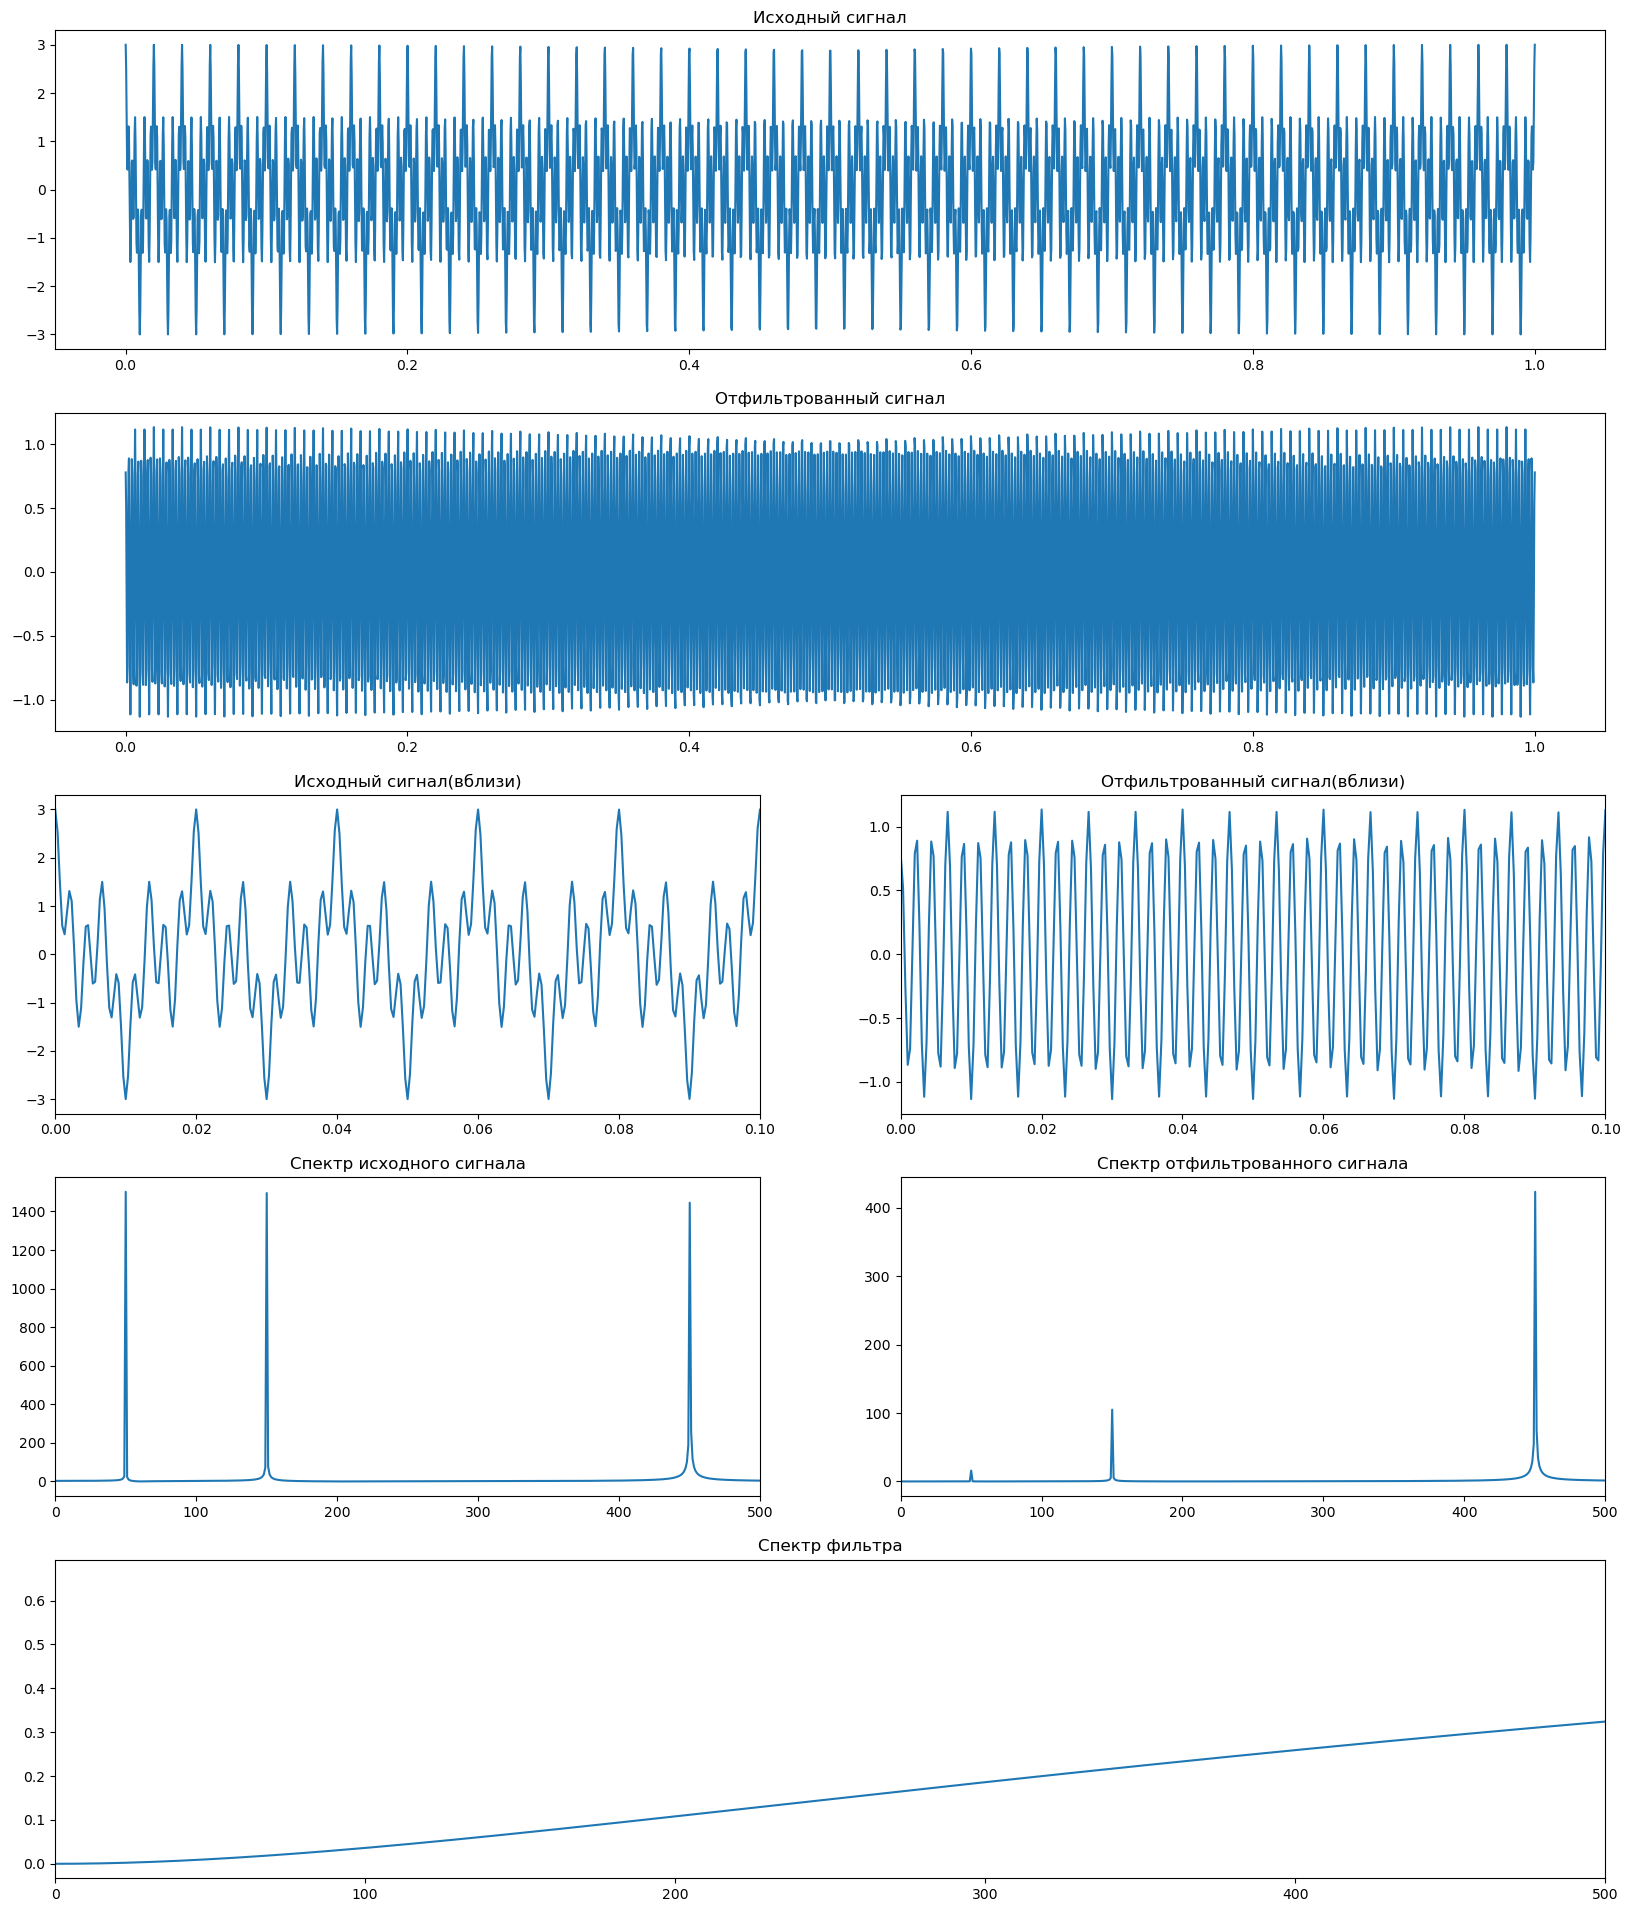

In [16]:
def butterworth_high(signal_frequency, cutoff_frequency):
    cutoff_frequency *= np.pi * 2
    signal_frequency *= 1j * np.pi * 2
    
    transmission_coefficient = (signal_frequency ** 2) / (-cutoff_frequency ** 2 + 1j * np.sqrt(2) * cutoff_frequency * signal_frequency + signal_frequency ** 2)
    return transmission_coefficient


filter_coef = butterworth_high(np.asarray(np.fft.fftfreq(len(x), 1/3000), complex), 450)
filtered_signal = np.fft.ifft(y_fft * filter_coef.real)

plt.figure(figsize=(20, 24))

plt.subplot(5, 1, 1)
plt.plot(x, y)
plt.title("Исходный сигнал")

plt.subplot(5, 1, 2)
plt.plot(x, filtered_signal.real)
plt.title("Отфильтрованный сигнал")

plt.subplot(5, 2, 5)
plt.plot(x, y)
plt.xlim(0, 0.1)
plt.title("Исходный сигнал(вблизи)")

plt.subplot(5, 2, 6)
plt.plot(x, filtered_signal.real)
plt.xlim(0, 0.1)
plt.title("Отфильтрованный сигнал(вблизи)")

plt.subplot(5, 2, 7)
plt.plot(x_freq, np.abs(y_fft[:len(y_fft)//2]))
plt.xlim(0, 500)
plt.title("Спектр исходного сигнала")

plt.subplot(5, 2, 8)
plt.plot(x_freq, np.abs((np.fft.fft(filtered_signal))[:len(y_fft)//2]))
plt.xlim(0, 500)
plt.title("Спектр отфильтрованного сигнала")

plt.subplot(5, 1, 5)
plt.plot(x_freq, filter_coef.real[:len(y_fft)//2])
plt.xlim(0, 500)
plt.title("Спектр фильтра")

plt.show()

### Задание 5
Построить полосовой фильтр и заграждающий фильтр (ПФ/ЗФ) настроенный на частоту
150Гц. При моделировании использовать формулы (36) и (37).

Построить графики исходного и отфильтрованного сигнала, спектра сигнала и фильтров
ПФ/ЗФ.

### Задание 6
Согласно формулам (28, 29) возможно построить фильтр Баттерворта любого порядка.
Постройте фильтр Баттерворта 4-го и 5-го порядка с автоматическим определением
полюсов фильтра. Реализуйте пункт 1 данной лабораторной для Фильтра Баттерворта 5-го
порядка.

примеч.: Полюсы передаточной функции обладают симметрией, а именно их число и
конфигурация расположения в обеих полуплоскостях одинаковы. При этом физически
реализуемому фильтру отвечают только полюсы, расположенные в левой полуплоскости.

### Задание 7
Сравните реализованный Вами фильтр 5-го порядка с фильтром 2-го порядка, объясните
разницу.

### Задание 8
Сравните Ваш алгоритм ФНЧ Баттерворта 5-го порядка с встроенным фильтром
Баттерворта библиотеки scipy.signal также для 5-го порядка используя.

### Задание 9
Добавить шум к исходному сигналу, посмотрите как происходит фильтрация для
зашумленного сигнала.

### Задание 10
Реализуйте фильтр ФНЧ Чебышева 1-го рода N порядка.